Download Kaggle Dataset (https://www.kaggle.com/general/156610) 

In [ ]:
from google.colab import files

uploaded = files.upload() #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

https://www.kaggle.com/docs/api - create a new API key.

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9632        322  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           8115        200  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:26:03            647         42  1.0              
anas123siddiqui/mobiles                                    Mobiles                                      59KB  2023-02-18 16:3

In [ ]:
!kaggle datasets download -d rohanrao/air-quality-data-in-india

 95% 69.0M/72.9M [00:00<00:00, 135MB/s]
100% 72.9M/72.9M [00:00<00:00, 112MB/s]


In [ ]:
!unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


# Explore Mumbai Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

How many stations are there in Mumbai?

In [ ]:
df = pd.read_csv('stations.csv')
df.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [ ]:
# get all rows with City = 'Mumbai'
mumbai_df = df[df['City'] == 'Mumbai']

# print the resulting dataframe
print(mumbai_df)

    StationId                                        StationName    City  \
139     MH005                              Bandra, Mumbai - MPCB  Mumbai   
140     MH006                       Borivali East, Mumbai - MPCB  Mumbai   
141     MH007  Chhatrapati Shivaji Intl. Airport (T2), Mumbai...  Mumbai   
142     MH008                              Colaba, Mumbai - MPCB  Mumbai   
143     MH009                               Kurla, Mumbai - MPCB  Mumbai   
144     MH010                               Powai, Mumbai - MPCB  Mumbai   
145     MH011                                Sion, Mumbai - MPCB  Mumbai   
146     MH012                          Vasai West, Mumbai - MPCB  Mumbai   
147     MH013                     Vile Parle West, Mumbai - MPCB  Mumbai   
148     MH014                               Worli, Mumbai - MPCB  Mumbai   

           State  Status  
139  Maharashtra  Active  
140  Maharashtra  Active  
141  Maharashtra  Active  
142  Maharashtra  Active  
143  Maharashtra  Active  
1

In [ ]:
len(mumbai_df)
mumbai_df.describe()

,StationId,StationName,City,State,Status
count,10,10,10,10,10
unique,10,10,1,1,1
top,MH005,"Bandra, Mumbai - MPCB",Mumbai,Maharashtra,Active
freq,1,1,10,10,10


There are 10 stations. 

Next load `city_day` data.

In [ ]:
city_day_df = pd.read_csv('city_day.csv')
city_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Extract the Mumbai data.

In [ ]:
mumbai_day_df = city_day_df[city_day_df['City']=='Mumbai']
mumbai_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
21856,Mumbai,2015-01-02,NaN,NaN,NaN,NaN,26.20,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
21857,Mumbai,2015-01-03,NaN,NaN,NaN,NaN,26.04,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
21858,Mumbai,2015-01-04,NaN,NaN,NaN,NaN,25.97,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
21859,Mumbai,2015-01-05,NaN,NaN,NaN,NaN,25.18,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN


Each row is a daily observation for Mumbai. Values from the individual stations are possibly averaged over 24 hours. 

In [ ]:
len(mumbai_day_df)

2009

In [ ]:
begin_date = list(mumbai_day_df['Date'])[0]
end_date = list(mumbai_day_df['Date'])[-1]
print(f'Data date range: {begin_date} to {end_date}')

Data date range: 2015-01-01 to 2020-07-01


In [ ]:
mumbai_day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 21855 to 23863
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       784 non-null    float64
 3   PM10        763 non-null    float64
 4   NO          767 non-null    float64
 5   NO2         756 non-null    float64
 6   NOx         1510 non-null   float64
 7   NH3         395 non-null    float64
 8   CO          1984 non-null   float64
 9   SO2         789 non-null    float64
 10  O3          797 non-null    float64
 11  Benzene     1799 non-null   float64
 12  Toluene     1016 non-null   float64
 13  Xylene      1015 non-null   float64
 14  AQI         775 non-null    float64
 15  AQI_Bucket  775 non-null    object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


Convert `Date` column to datetime object

In [ ]:
mumbai_day_df["Date"] = pd.to_datetime(mumbai_day_df.Date)

<ipython-input-19-67cdaab268c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_day_df["Date"] = pd.to_datetime(mumbai_day_df.Date)


In [ ]:
mumbai_day_df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

## Check missing values 

In [ ]:
print(100 * mumbai_day_df.isnull().sum()/len(mumbai_day_df))

City           0.000000
Date           0.000000
PM2.5         60.975610
PM10          62.020906
NO            61.821802
NO2           62.369338
NOx           24.838228
NH3           80.338477
CO             1.244400
SO2           60.726730
O3            60.328522
Benzene       10.452962
Toluene       49.427576
Xylene        49.477352
AQI           61.423594
AQI_Bucket    61.423594
dtype: float64


The main pollutants PM, NOx, SO2, O3 have around 60% missing data.

## Visualise

https://www.codecademy.com/article/visualizing-time-series-data-with-python

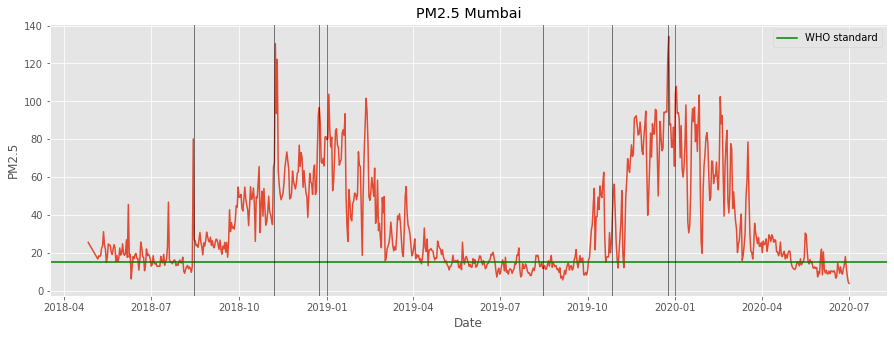

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="PM2.5", ax=ax, data=mumbai_day_df)
graph.axhline(15, color='green', label="WHO standard")
graph.axvline(x=pd.to_datetime("2018-08-15"), color="black", lw=0.5) #Independence day
graph.axvline(x=pd.to_datetime("2018-11-07"), color="black", lw=0.5) #Diwali in 2018
graph.axvline(x=pd.to_datetime("2018-12-24"), color="black", lw=0.5) #xmas 2018
graph.axvline(x=pd.to_datetime("2019-01-01"), color="black", lw=0.5) #new years 2018

graph.axvline(x=pd.to_datetime("2019-08-15"), color="black", lw=0.5) #Independence day
graph.axvline(x=pd.to_datetime("2019-10-27"), color="black", lw=0.5) #Diwali in 2019
graph.axvline(x=pd.to_datetime("2019-12-24"), color="black", lw=0.5) #xmas 2019
graph.axvline(x=pd.to_datetime("2020-01-01"), color="black", lw=0.5) #new years 2019

graph.set(title="PM2.5 Mumbai")

plt.legend()
plt.show()



*   There is a seasonality to the time series. During the summer months, from April to October PM2.5 values are in general lower. 
*   Christmas eve and New Years shows peaks in both 2018, 2019.
*   2018 Diwali accounts for a peak, but not in 2019. (https://www.nature.com/articles/d44151-023-00022-2)



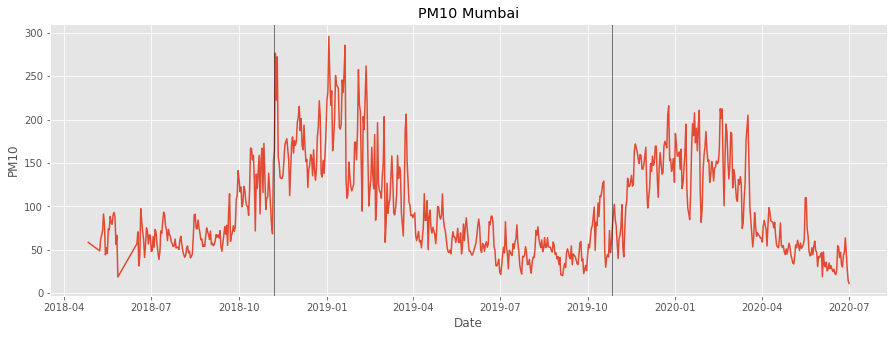

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="PM10", ax=ax, data=mumbai_day_df)

graph.axvline(x=pd.to_datetime("2018-11-07"), color="black", lw=0.5) #Diwali in 2018
graph.axvline(x=pd.to_datetime("2019-10-27"), color="black", lw=0.5) #Diwali in 2019

graph.set(title="PM10 Mumbai")

plt.show()

#TODO 
Visualise to find missing data for this dataset

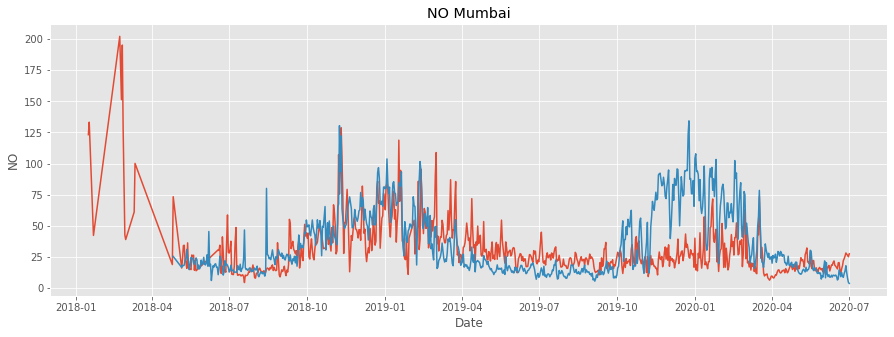

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="NO", ax=ax, data=mumbai_day_df).set(title="NO Mumbai")
sns.lineplot(x="Date", y="PM2.5", ax=ax, data=mumbai_day_df).set(title="NO Mumbai")

plt.show()

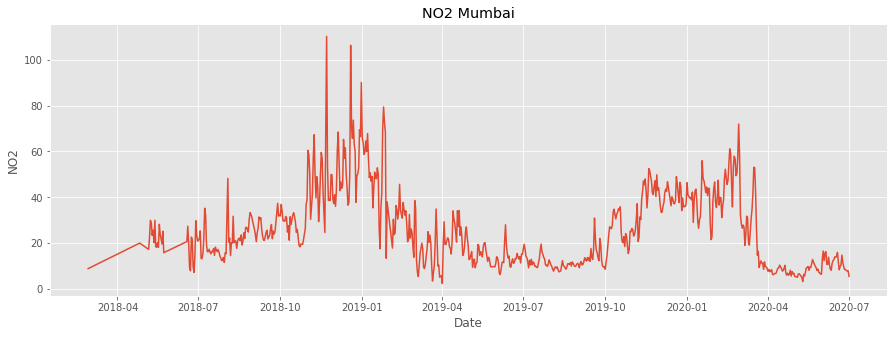

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="NO2", ax=ax, data=mumbai_day_df).set(title="NO2 Mumbai")

plt.show()

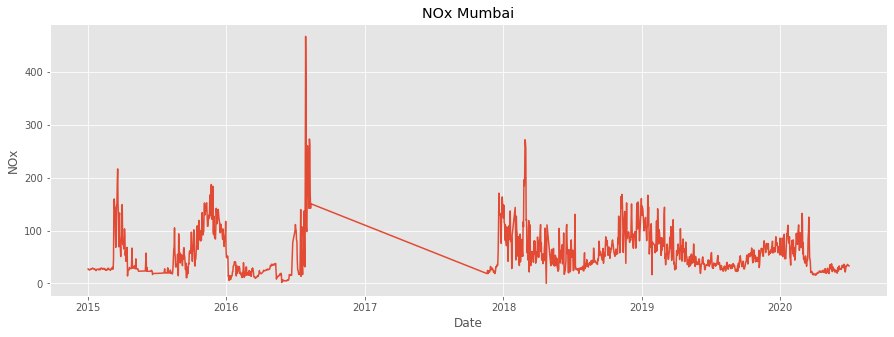

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="NOx", ax=ax, data=mumbai_day_df).set(title="NOx Mumbai")

plt.show()

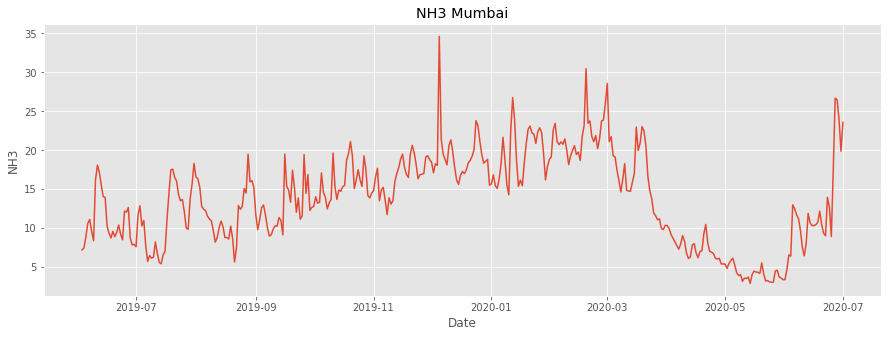

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="NH3", ax=ax, data=mumbai_day_df).set(title="NH3 Mumbai")

plt.show()

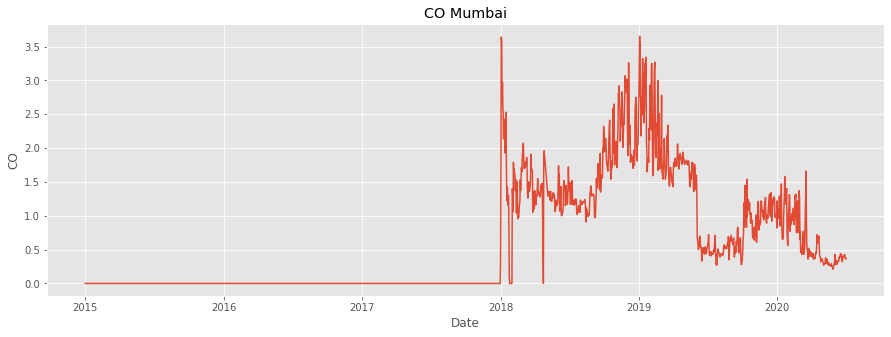

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="CO", ax=ax, data=mumbai_day_df).set(title="CO Mumbai")

plt.show()

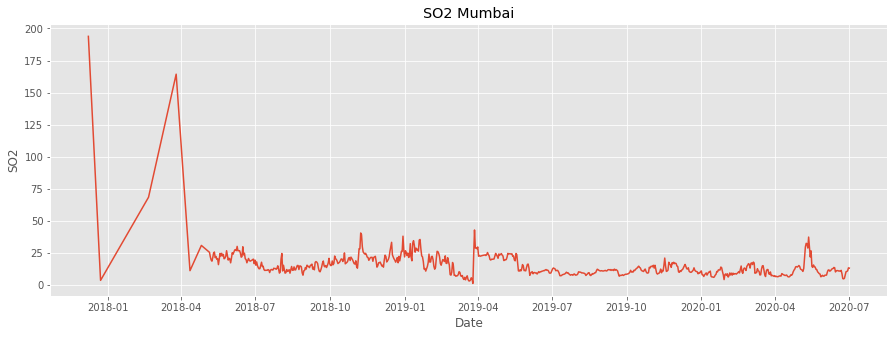

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="SO2", ax=ax, data=mumbai_day_df).set(title="SO2 Mumbai")

plt.show()

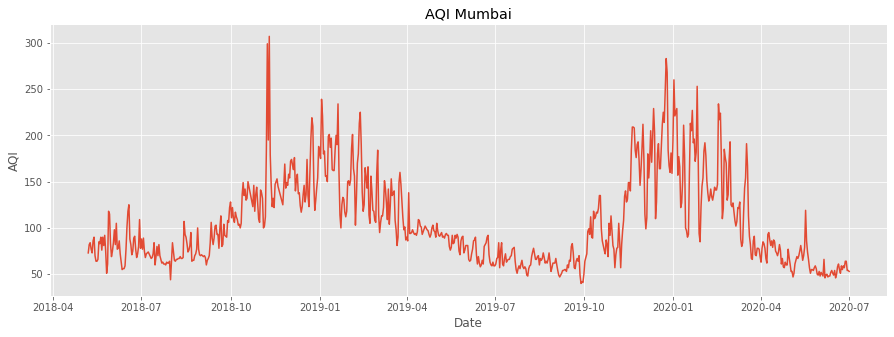

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
sns.lineplot(x="Date", y="AQI", ax=ax, data=mumbai_day_df).set(title="AQI Mumbai")

plt.show()

In [ ]:
# extract year from date column
mumbai_day_df["year"] = mumbai_day_df["Date"].dt.year


<ipython-input-77-a1f3c00ed578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_day_df["year"] = mumbai_day_df["Date"].dt.year


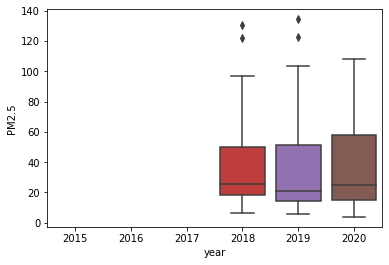

In [ ]:
# box plot grouped by year
sns.boxplot(data=mumbai_day_df, x="year", y="PM2.5")
plt.show()

In [ ]:
# extract month from date column
mumbai_day_df["month"] = mumbai_day_df["Date"].dt.month


<ipython-input-65-1a787fdeb03d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_day_df["month"] = mumbai_day_df["Date"].dt.month


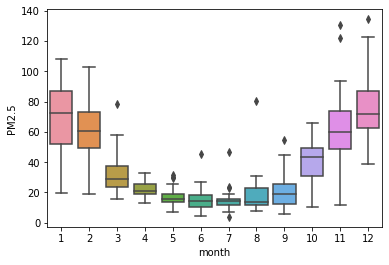

In [ ]:
# box plot grouped by month
sns.boxplot(data=mumbai_day_df, x="month", y="PM2.5")
plt.show()

In [ ]:
# extract day from date column
mumbai_day_df["day"] = mumbai_day_df["Date"].dt.day


<ipython-input-67-7b08e9085901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_day_df["day"] = mumbai_day_df["Date"].dt.day


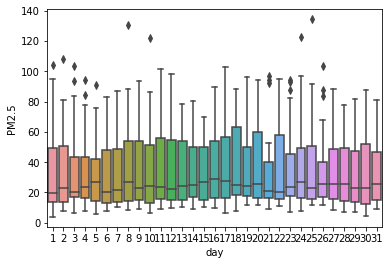

In [ ]:
# box plot grouped by day
sns.boxplot(data=mumbai_day_df, x="day", y="PM2.5")
plt.show()

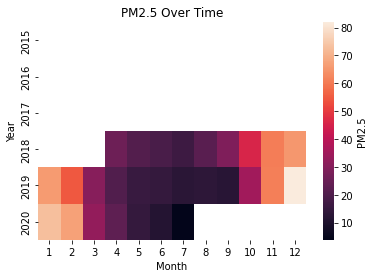

In [ ]:
# calculate total sales for each month
aqi = mumbai_day_df.groupby(["year", "month"]).mean()

# re-format the data for the heat-map
aqi_month_year = aqi.reset_index().pivot(index="year", columns="month", values="PM2.5")

# create heatmap
sns.heatmap(aqi_month_year, cbar_kws={"label": "PM2.5"})
plt.title("PM2.5 Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

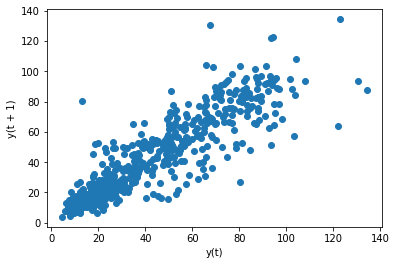

In [ ]:
# import lag_plot function
from pandas.plotting import lag_plot

# lag scatter plot
lag_plot(mumbai_day_df['PM2.5'])
plt.show()